# Deep Learning with PyTorch Step-by-Step: A Beginner's Guide

# Chapter 1

In [1]:
from config import *

# This is needed to render the plots in this chapter
from plots.chapter1 import *

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
#from torchviz import make_dot

# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [4]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

### Splitting data

In [5]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

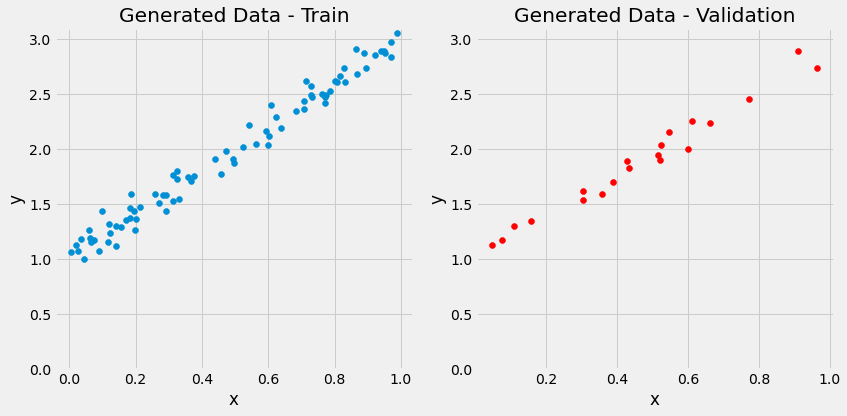

In [6]:
figure1(x_train, y_train, x_val, y_val);

# Gradient Descent

## Step 0: Random Initialization

In [7]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [8]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

## Step 2: Compute the Loss

In [9]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


## Step 3: Compute the Gradients

In [10]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


## Step 4: Update the Parameters

In [11]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and 
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


## Step 5: Rinse and Repeat!

In [12]:
# Go back to Step 1 and run observe how your parameters b and w change

# Linear Regression in Numpy

### Implementing linear regression using Numpy

In [13]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!   
    error = (yhat - y_train)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad
    
print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [14]:
# Sanity Check: do we get the same results as our
# gradient descent?
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


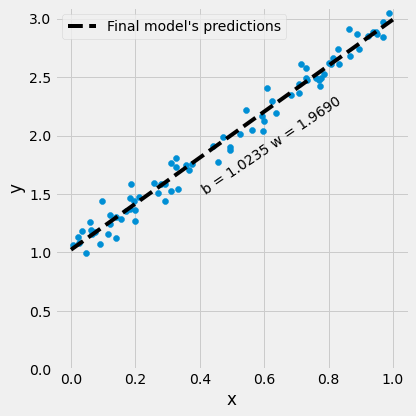

In [15]:
fig = figure3(x_train, y_train)

# PyTorch

## Tensor

In Numpy, you may have an array that has three dimensions, right? That is, technically speaking, a tensor.

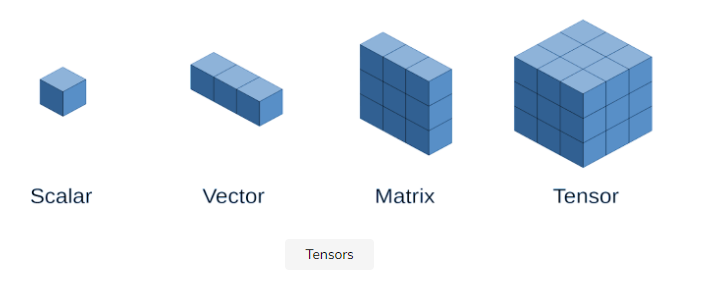

But to keep things simple, it is commonplace to call vectors and matrices tensors as well. So, from now on, everything is either a scalar or a tensor.

You can create tensors in PyTorch the same way you create arrays in Numpy. Using tensor(), you can create either a scalar or a tensor.

Tensors in PyTorch have equivalent functions as its Numpy counterparts like: ones(), zeros(), rand(), randn(), and many more.

In [16]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[-2.6770, -0.3645, -0.0465, -1.8827],
         [ 2.5657,  2.5386, -0.2392,  0.0433],
         [ 0.0554, -0.5200, -0.5641,  0.9548]],

        [[ 1.1869,  1.5149,  1.2394, -0.5532],
         [ 0.3875,  1.1433,  0.9256,  0.8929],
         [ 0.0674, -0.4828,  0.5209, -0.9194]]])


In [18]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


In [19]:
print(scalar.size(), scalar.shape)

torch.Size([]) torch.Size([])


**Reshaping**

In [20]:
# We get a tensor with a different shape but it still is
# the SAME tensor
same_matrix = matrix.view(1, 6)
# If we change one of its elements...
same_matrix[0, 1] = 2.
# It changes both variables: matrix and same_matrix
print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


In [19]:
# We can use "new_tensor" method to REALLY copy it into a new one
different_matrix = matrix.new_tensor(matrix.view(1, 6))  # -> better with clone().detach().requires_grad_(True)
# Now, if we change one of its elements...
different_matrix[0, 1] = 3.
# The original tensor (matrix) is left untouched!
# But we get a "warning" from PyTorch telling us 
# to use "clone()" instead!
print(matrix)
print(different_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


/home/dvgodoy/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  


In [21]:
# Lets follow PyTorch's suggestion and use "clone" method
another_matrix = matrix.view(1, 6).clone().detach()
# Again, if we change one of its elements...
another_matrix[0, 1] = 4.
# The original tensor (matrix) is left untouched!
print(matrix)
print(another_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


## Loading Data, Devices and CUDA

`x_train` is a numpy array. The `as_tensor` method preserves the type of the array, which can also be seen in the code below:

In [23]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

You can also easily cast it to a different type like a lower precision (32-bit) `float`, which will occupy less space in memory using the float() method:

In [25]:
float_tensor = x_train_tensor.float()  # from float64 to float32
float_tensor.dtype

torch.float32

> **IMPORTANT**: Both as_tensor() and from_numpy() return a tensor that shares the underlying data with the original Numpy array. Similar to what happened when we used view() in the previous lesson, if you modify the original Numpy array, you are modifying the corresponding PyTorch tensor too and vice-versa.

In [27]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)
# Modifies the numpy array
dummy_array[1] = 0
# Tensor gets modified too...
dummy_tensor

tensor([1, 0, 3], dtype=torch.int32)

**The `numpy` method**

You can also perform the opposite operation; namely, transforming a PyTorch tensor back to a Numpy array using the numpy() method:

In [29]:
dummy_tensor.numpy()

array([1, 0, 3])

### Defining your device

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [32]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

NVIDIA GeForce GTX 1050


In [33]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]

tensor([0.7713], device='cuda:0', dtype=torch.float64)

### Turning tensor into GPU tensor

In [36]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them 
# into PyTorch's Tensors and then we send them to the 
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)  # numpy -> py tensor -> float32 py tensor -> float32 gpu py tensor
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [41]:
# Here we can see the difference - notice that .type() is more
# useful since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [43]:
x_train_cpu_tensor = torch.as_tensor(x_train).float()
type(x_train_cpu_tensor), x_train_cpu_tensor.type()

(torch.Tensor, 'torch.FloatTensor')

Unfortunately, Numpy cannot handle GPU tensors.

In [38]:
back_to_numpy = x_train_tensor.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

You need to make them CPU tensors first using cpu():

In [44]:
back_to_numpy = x_train_tensor.cpu().numpy()

## Creating Parameters

In [45]:
# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we
# did in Numpy since we want to apply gradient descent on
# these parameters we need to set REQUIRES_GRAD = TRUE
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [46]:
# SECOND
# But what if we want to run it on a GPU? We could just
# send them to device, right?
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)
# Sorry, but NO! The to(device) "shadows" the gradient...

tensor([0.3367], device='cuda:0', grad_fn=<ToCopyBackward0>) tensor([0.1288], device='cuda:0', grad_fn=<ToCopyBackward0>)


We succeeded in sending them to another device, but we lost the gradients somehow since there is no more requires_grad=True (don’t bother with the weird grad_fn). Clearly, we need to do better.

In [47]:
# THIRD
# We can either create regular tensors and send them to
# the device (as we did with our data)
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], device='cuda:0', requires_grad=True) tensor([0.1288], device='cuda:0', requires_grad=True)


This approach worked fine. We managed to end up with gradient-requiring GPU tensors for our parameters b and w. It seems like a lot of work though. Can we do better still?

### Final attempt

Correct way: assign tensors to a device at the moment of their creation.

In [48]:
# FINAL
# We can specify the device at the moment of creation
# RECOMMENDED!

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


# Autograd

### The `backward` method

So, how do we tell PyTorch to do its thing and compute all gradients? That is the role of the backward() method. It will compute gradients for all (requiring gradient) tensors involved in the computation of a given variable.

Do you remember the starting point for computing the gradients? It was the loss, as we computed its partial derivatives w.r.t. our parameters. Hence, we need to invoke the backward() method from the corresponding Python variable: loss.backward().

In [59]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error! 
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# Step 3 - Computes gradients for both "b" and "w" parameters
# No more manual computation of gradients! 
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()
loss.backward()

#### Tensors handled by backward

In our example, which tensors are going to be handled by the `backward()` method applied to the loss?

We have set `requires_grad=True` to both `b` and `w`, so they are obviously included in the list. We use them both to compute `yhat`, so it will also make it to the list. Then we use `yhat` to compute the `error`, which is also added to the list. Hence, the following will be handled by the `backward` method:

- `b`
- `w`
- `yhat`
- `error`

Do you see the pattern here? If a tensor in the list is used to compute another tensor, the latter will also be included in the list. Tracking these dependencies is exactly what the dynamic computation graph is doing, as we will see shortly.

What about `x_train_tensor` and `y_train_tensor`? They are involved in the computation too, but we created them as “not” gradient-requiring tensors, so `backward()` does not care about them.

In [54]:
print(error.requires_grad, yhat.requires_grad, \
      b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


## grad

What about the actual values of the gradients? We can inspect them by looking at the grad attribute of a tensor.

In [63]:
print(b.grad, w.grad)

tensor([0.], device='cuda:0') tensor([0.], device='cuda:0')


In [56]:
# Just run the two cells above one more time 

## zero_

Every time we use the gradients to update the parameters, we need to zero the gradients afterward. And that is what zero_() is good for.

In [61]:
# This code will be placed *after* Step 4
# (updating the parameters)
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

## Updating Parameters

Unfortunately, our Numpy’s code for updating parameters is not enough. Why not? Let us try it out by simply copying and pasting it (this is the first attempt), changing it slightly (second attempt), and then asking PyTorch to back off (yes, it is PyTorch’s fault!).

### First attempt

In the first attempt, if we use the same update structure as in our Numpy code, we will get a weird error, but we can get a hint of what is going on by looking at the tensor itself. Once again, we “lost” the gradient while reassigning the update results to our parameters. Thus, the grad attribute turns out to be None, and it raises the error.

In [67]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    # No more manual computation of gradients! 
    # b_grad = 2 * error.mean()
    # w_grad = 2 * (x_tensor * error).mean()   
    # We just tell PyTorch to work its way BACKWARDS 
    # from the specified loss!
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate. But not so fast...
    # FIRST ATTEMPT - just using the same code as before
    # AttributeError: 'NoneType' object has no attribute 'zero_'
#     b = b - lr * b.grad
#     w = w - lr * w.grad
#     print(b)

    # SECOND ATTEMPT - using in-place Python assigment
    # RuntimeError: a leaf Variable that requires grad
    # has been used in an in-place operation.
#     b -= lr * b.grad
#     w -= lr * w.grad        
    
    # THIRD ATTEMPT - NO_GRAD for the win!
    # We need to use NO_GRAD to keep the update out of
    # the gradient computation. Why is that? It boils 
    # down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad
    
    # PyTorch is "clingy" to its computed gradients, we
    # need to tell it to let it go...
    b.grad.zero_()
    w.grad.zero_()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


## no_grad

In [41]:
# This is what we used in the THIRD ATTEMPT...

# Dynamic Computation Graph

In [70]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error! 
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# We can try plotting the graph for any python variable: 
# yhat, error, loss...

#make_dot(yhat)  # I don't have this library installed...

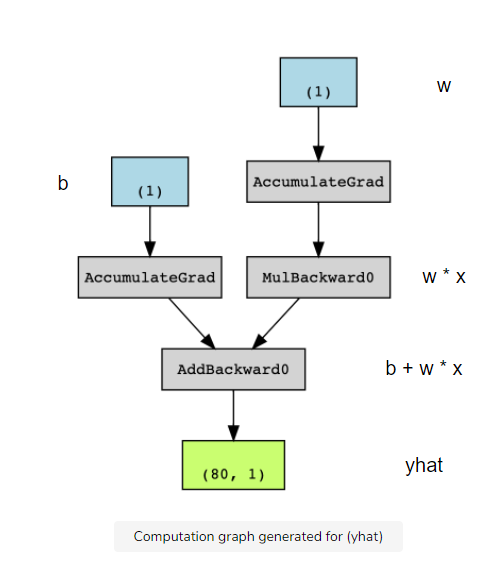

Let us take a closer look at its components:

- **Blue boxes ((1)s)**: These boxes correspond to the tensors we use as parameters; the ones we are asking PyTorch to compute gradients for.

- **Gray boxes (MulBackward0 and AddBackward0)**: A Python operation that involves a gradient-computing tensor or its dependencies.

- **Green box ((80, 1))**: The tensor is used as the starting point for the computation of gradients, assuming the backward() method is called from the variable used to visualize the graph. They are computed from the bottom-up in a graph.

Now, take a closer look at the gray box at the bottom of the graph; two arrows are pointing to it since it is adding up to two variables of b and w*x. Seems obvious, right?

Then, look at the gray box (MulBackward0) of the same graph; it is performing a multiplication, namely, w*x. But there is only one arrow pointing to it! The arrow comes from the blue box that corresponds to our parameter w.

### Plotting without gradients

In [71]:
b_nograd = torch.randn(1, requires_grad=False, \
                       dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

yhat = b_nograd + w * x_train_tensor

#make_dot(yhat)

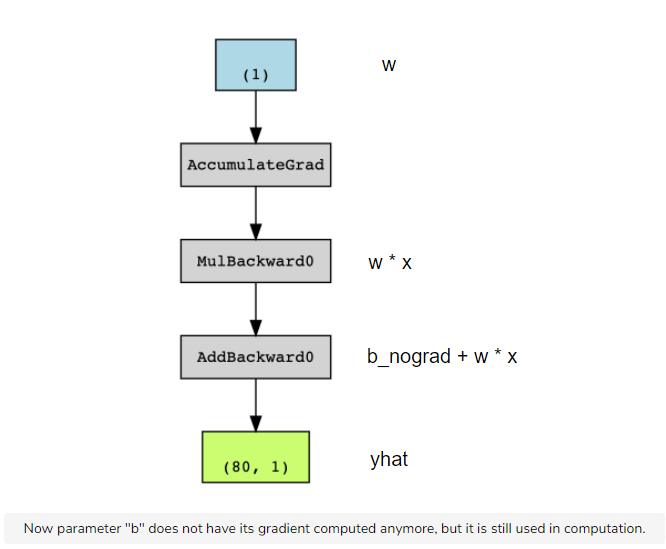

### Complex dynamic computation graphs

The best thing about the dynamic computation graph is the fact that you can make it as complex as you want it. You can even use control flow statements (e.g., if statements) to control the flow of the gradients.

The code and figure below show an example of this. And yes, we do know that the computation itself is complete nonsense.

In [72]:
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

yhat = b + w * x_train_tensor
error = yhat - y_train_tensor
loss = (error ** 2).mean()

# this makes no sense!!
if loss > 0:
    yhat2 = w * x_train_tensor
    error2 = yhat2 - y_train_tensor
    
# neither does this :-)
loss += error2.mean()

#make_dot(loss)

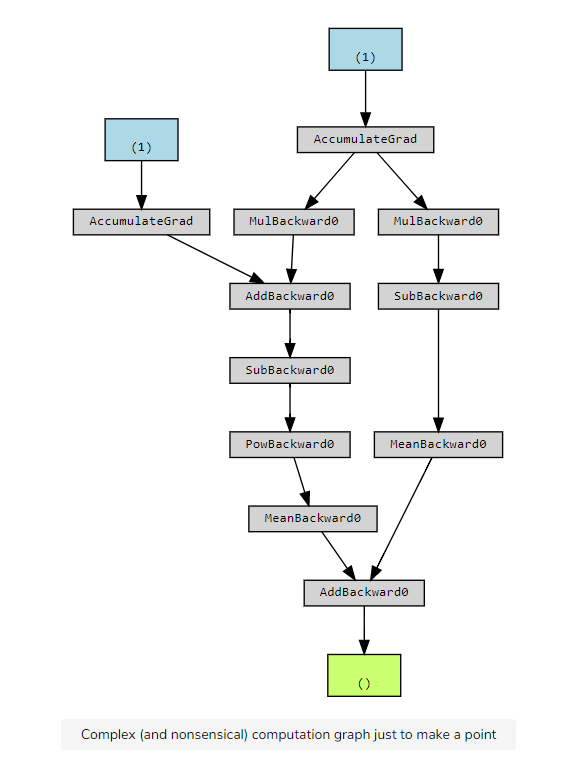

# Optimizer

So far, we have been manually updating the parameters using the computed gradients. That is probably fine for two parameters, but what if we had a whole lot of them? We need to use one of PyTorch’s optimizers like **SGD, RMSprop, or Adam**.

An example of this can be seen below where a SGD optimizer is defined:

In [73]:
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

### The `step` and `zero_grad` methods

An optimizer takes the parameters we want to update, the learning rate we want to use (and possibly many other hyper-parameters as well), and performs the updates through its step() method.

Besides, we also do not need to zero the gradients one-by-one anymore. We just invoke the optimizer’s zero_grad() method, and that is it!

In the code below, we create a **Stochastic Gradient Descent (SGD)** optimizer to update our parameters b and w.

In [74]:
# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient 
    # descent. How wrong is our model? That's the error! 
    error = (yhat - y_train_tensor)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate. No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()
    
    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Loss

There are many loss functions to choose from depending on the task at hand. Since ours is a regression, we are using the Mean Squared Error (MSE) as our loss, and thus we need PyTorch’s nn.MSELoss:

In [78]:
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
loss_fn

# You can average them (reduction="mean") or simply sum them up (reduction="sum"). 
# In our example, we use the typical mean reduction to compute MSE. 
# If we had used sum as reduction, we would actually be computing SSE (Sum of Squared Errors).

MSELoss()

Notice that `nn.MSELoss` is not the loss function itself. We do not pass predictions and labels to it! Instead, as you can see, it returns another function, which we called `loss_fn`. That is the actual loss function. So, we can pass a prediction and a label to it, and get the corresponding loss value:

In [77]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])

loss_fn(predictions, labels)

tensor(1.1700)

### Using the created loss function

In [80]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, \
                dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor
    
    # Step 2 - Computes the loss
    # No more manual loss!
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
print(b, w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [81]:
loss

tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward0>)

Attempting to convert to Numpy:

In [82]:
loss.cpu().numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

To use numpy(), we need to `detach()` the tensor from the computation graph first:

In [83]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

We can use item() for tensors with a single element or tolist() otherwise (it still returns a scalar if there is only one element though).

In [84]:
print(loss.item(), loss.tolist())

0.008044655434787273 0.008044655434787273


# Model

#### Introduction to models

In PyTorch, a model is represented by a regular Python class that inherits from the Module class.

The most fundamental methods a model class needs to implement are:

- `__init__(self)`: It defines the **parts that make up the model**; in our case, two parameters of `b` and `w`.

> You are not limited to defining parameters though. Models can contain other models as their attributes as well, so you can easily nest them. 
Besides, do not forget to include super().__init__() to execute the __init__() method of the parent class (nn.Module) before your own.

- `forward(self, x)`: It performs the **actual computation**; that is, it outputs a prediction, given the input `x`.

>It may seem weird, but whenever you are using your model to make predictions, you should not call the `forward(x)` method!
You should call the whole model instead (as in model(x)) to perform a forward pass and output predictions.
The reason for this is because the call to the whole model involves extra steps, namely, handling forward and backward hooks. If you do not use hooks (and we do not use any right now), both calls are equivalent.

> Hooks are a very useful mechanism that allows retrieving intermediate values in deeper models. They are beyond the scope of this course.

Let us build a proper (yet simple) model for our regression task. It should look like this:

In [85]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model,
        # we need to wrap them with nn.Parameter
        self.b = nn.Parameter(torch.randn(1,
                                          requires_grad=True, 
                                          dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, 
                                          requires_grad=True,
                                          dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

### The `Parameter` and `parameters` methods

In the `__init__` method, we define our two parameters of `b` and `w`, using the `Parameter()` class, to tell PyTorch that these tensors, which are attributes of the `ManualLinearRegression` class, should be considered parameters of the model the class represents.

Why should we care about that? By doing so, we can use our model’s `parameters()` method to retrieve an iterator over all model’s parameters, including parameters of **nested models**. Then we can use it to feed our optimizer (instead of building a list of parameters ourselves)

In [88]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### The state_dict method

Moreover, we can get the current values of all parameters using our model’s `state_dict()` method.

In [89]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

The state_dict() of a given model is simply a Python dictionary that maps each attribute/parameter to its corresponding tensor. But **only learnable parameters** are included, as its purpose is to keep track of parameters that are going to be updated by the optimizer.

By the way, the **optimizer** itself has a `state_dict()` too, which contains its internal state as well as other hyper-parameters.

In [91]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [0, 1]}]}

## device

If we were to send our dummy model to a device, it would look like this:

In [92]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device)

## Forward Pass

The forward pass is the moment when the model makes predictions.

> Remember: You should make predictions that call model(x).
  Do not call model.forward(x)!
  Otherwise, your model’s hooks will not work (if you have them).

In [94]:
# Sets learning rate - this is "eta" ~ the "n"-like
# Greek letter
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)

# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)   #Instantiating a model

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train() # What is this?!?

    # Step 1 - Computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)   # New step...
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    
# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


## train method

In PyTorch, models have a train() method, which does NOT perform a training step. Its only purpose is to set the model to training mode.

Why is this important? Some models may use mechanisms like Dropout for instance, which have distinct behaviors during training and evaluation phases.

In [60]:
## Never forget to include model.train() in your training loop!

## Nested Models

In [61]:
linear = nn.Linear(1, 1)
linear

Linear(in_features=1, out_features=1, bias=True)

In [62]:
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]])), ('bias', tensor([0.2018]))])

### Cell 1.11

In [64]:
class MyLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear model
        # with single input and single output
        self.linear = nn.Linear(1, 1)
                
    def forward(self, x):
        # Now it only takes a call
        self.linear(x)

In [65]:
torch.manual_seed(42)
dummy = MyLinearRegression().to(device)
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [66]:
dummy.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

## Sequential Models

### Cell 1.12

In [67]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

## Layers

In [68]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [69]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

Sequential(
  (layer1): Linear(in_features=3, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

# Putting It All Together

## Data Preparation

### Data Preparation V0

In [71]:
%%writefile data_preparation/v0.py

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the 
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Overwriting data_preparation/v0.py


In [72]:
%run -i data_preparation/v0.py

## Model Configurtion

### Model Configuration V0

In [73]:
%%writefile model_configuration/v0.py

# This is redundant now, but it won't be when we introduce
# Datasets...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters 
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

Overwriting model_configuration/v0.py


In [74]:
%run -i model_configuration/v0.py

## Model Training

### Model Training V0

In [75]:
%%writefile model_training/v0.py

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)
    
    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()
    
    # Step 4 - Updates parameters using gradients and 
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

Overwriting model_training/v0.py


In [76]:
%run -i model_training/v0.py

In [77]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
